In [1]:
import pandas as pd
import numpy as np
import datetime
import requests
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup

In [2]:
site = 'http://www.imobiliariaitagua.com.br'

imoveis = []
page = 1
fim= 0

while fim ==0:
    print (page)
    html = requests.get(site + "/p-casa-todos-ubatuba-ordenacao-7.html?page={}&search%5Bform%5D=PropertySearch".format(page)).content
    soup = BeautifulSoup(html, 'html.parser')    
    
    casas_ini = soup.find_all(class_='link')
    
    if len(casas_ini) ==0:
        fim=1
        page=1
    else:
        for casa in casas_ini:
            imoveis.append(site+casa['href'])
        page=page+1 

1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [3]:
df = pd.DataFrame(columns=['link','codigo','bairro','valor','dorm','suite','sala','banheiro',
                           'lavabo','cozinha','dep_empregada','vagas','condominio','IPTU',
                           'dimensões','area_util','area_tot','area_constr','proximidades','desc'])

df['link'] = imoveis

In [5]:
df

,link,codigo,bairro,valor,dorm,suite,sala,banheiro,lavabo,cozinha,dep_empregada,vagas,condominio,IPTU,dimensões,area_util,area_tot,area_constr,proximidades,desc
0,http://www.imobiliariaitagua.com.br/2498-casa-...,Lc248,Centro,2700,4,3,2,2,NaN,1,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,Centro Farmácia Banca de Jornal Padaria ...,"Casa - Padrão em Ubatuba, Centro Casa co..."
1,http://www.imobiliariaitagua.com.br/2495-casa-...,ca1275,Perequê Açu,600000,3,1,1,2,NaN,1,NaN,5,NaN,NaN,NaN,158,300,NaN,Centro Farmácia Praia Banca de Jornal Su...,"Casa - Padrão em Ubatuba, Perequê Açu Ca..."
2,http://www.imobiliariaitagua.com.br/2494-casa-...,ca1274,Estufa I,580000,4,NaN,1,2,NaN,1,NaN,3,NaN,NaN,NaN,105,300,NaN,Centro Farmácia Supermercado Padaria Res...,"Casa - Padrão em Ubatuba, Estufa I Imóve..."
3,http://www.imobiliariaitagua.com.br/2492-casa-...,ca1273,Ipiranguinha,380000,3,1,1,2,NaN,1,NaN,1,NaN,NaN,NaN,130,235,NaN,Supermercado Padaria,"Casa - Padrão em Ubatuba, Ipiranguinha C..."
4,http://www.imobiliariaitagua.com.br/2476-casa-...,ca1271,Itagua,900000,3,NaN,3,3,NaN,1,NaN,4,NaN,NaN,NaN,363,450,NaN,Banca de Jornal Supermercado,"Casa - Padrão em Ubatuba, Itagua Casa em..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,http://www.imobiliariaitagua.com.br/92-casa-em...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,http://www.imobiliariaitagua.com.br/75-casa-em...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,http://www.imobiliariaitagua.com.br/69-casa-em...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,http://www.imobiliariaitagua.com.br/66-casa-em...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
for i,imovel in enumerate(df['link']):
    
    html = requests.get(imovel).content
    soup = BeautifulSoup(html, 'html.parser')    

    #valor
    try:
        valor = float(soup.find(class_='first-item').get_text().split(' ')[-2].replace('.','').replace(',','.'))
        df.iloc[i]['valor'] = valor
    
    except:
        valor = soup.find(class_='first-item').get_text().split(' ')[-2].replace('.','').replace(',','.')
        df.iloc[i]['valor'] = valor

    #bairro e codigo
    bairro = soup.find(class_='bg-header').select_one('p').get_text().split(',')[0]
    df.iloc[i]['bairro'] = bairro

    codigo = soup.find(class_='bg-header').select_one('p').get_text().split(',')[-1][-6:]
    df.iloc[i]['codigo'] = codigo

    #caracteristicas
    caracte = soup.find_all(class_='text-right')
    for var,col in zip(caracte,df.columns[4:18]):
        var =  var.get_text()
        
        if var == '---' or var == '  m²':
            var = np.nan
        elif 'R$' in var:
            try:
                df.iloc[i][col] = float(var.split()[1].replace(',','.'))
            except:
                df.iloc[i][col] = float(var.split()[1].replace('.','').replace(',','.'))
        else:
            try:
                df.iloc[i][col] = float(var)
            except:
                df.iloc[i][col] = float(var.split()[0])

    #proximidades
    try:
        prox = soup.find(class_='tabs-proximidade grid-12').get_text().replace('Proximidades','')
        df.iloc[i]['proximidades'] = prox
    except:
        df.iloc[i]['proximidades'] = np.nan

    #descrição
    desc = soup.find(class_='web-info grid-12').get_text().replace('\n','')
    df.iloc[i]['desc'] = desc

df['data'] = pd.to_datetime(datetime.date.today())
df.to_excel('Imob_Itagua_{}.xlsx'.format(datetime.date.today()))

In [237]:
numero = df.groupby('bairro').count().link
valor_tot =df.groupby('bairro').sum().valor

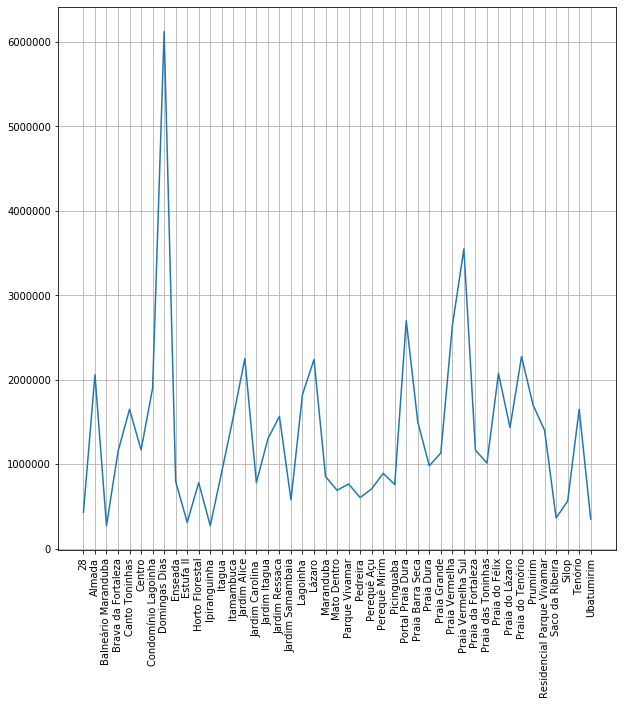

In [255]:
med_casa = valor_tot/numero

plt.figure(figsize=(10,10))
plt.plot(med_casa.index,med_casa.values)
plt.xticks(rotation=90)
plt.grid()

plt.show()

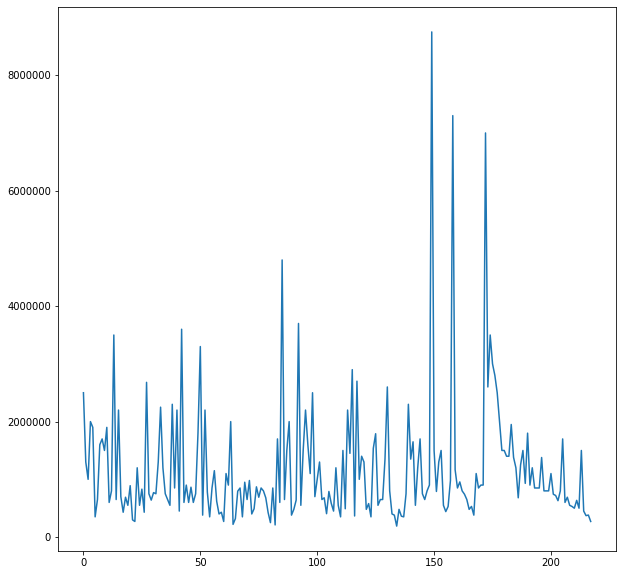

In [229]:
df.valor.plot(figsize=(10,10))